In [ ]:
import pandas as pd

# Load files
sample_submission = pd.read_csv("sample_submission.csv")
test_df = pd.read_csv("test.csv")
val_df = pd.read_csv("val.csv")
train_df = pd.read_csv("train.csv")  

# Display structure
print("Sample Submission:\n", sample_submission.head())
print("\nTest Data:\n", test_df.head())
print("\nValidation Data:\n", val_df.head())
print("\nTraining Data:\n", train_df.head())  


In [3]:
print("Columns in training data:", train_df.columns.tolist())
print("\nMissing values:\n", train_df.isnull().sum())
print("\nData types:\n", train_df.dtypes)
print("\nShape of training data:", train_df.shape)


Columns in training data: ['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty', 'Championship_Points', 'Championship_Position', 'Session', 'year_x', 'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname', 'circuit_name', 'rider_name', 'team_name', 'bike_name', 'Lap_Time_Seconds', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather', 'track', 'air', 'ground', 'starts', 'finishes', 'with_points', 'podiums', 'wins', 'min_year', 'max_year', 'years_active']

Missing values:
 Unique ID                               0
Rider_ID                                0
category_x                              0
Circuit_Length_km                       0
Laps                                    0
Grid_Position                           0
Avg_Speed_kmh      

In [ ]:
target = 'Lap_Time_Seconds'
features = train_df.drop(columns=[target])


In [5]:
print("Train Data Columns:", train_df.columns.tolist())
print("\nFirst few rows of train_df:\n", train_df.head())


Train Data Columns: ['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty', 'Championship_Points', 'Championship_Position', 'Session', 'year_x', 'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname', 'circuit_name', 'rider_name', 'team_name', 'bike_name', 'Lap_Time_Seconds', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather', 'track', 'air', 'ground', 'starts', 'finishes', 'with_points', 'podiums', 'wins', 'min_year', 'max_year', 'years_active']

First few rows of train_df:
    Unique ID  Rider_ID category_x  Circuit_Length_km  Laps  Grid_Position  \
0    1894944      2659      Moto2              4.874    22             17   
1      23438      5205      Moto2              3.875    24              7   
2     939678      7392      Moto3 

In [6]:
print("Shape of train_df:", train_df.shape)


Shape of train_df: (1914056, 45)


In [7]:
# Check missing values
print(train_df.isnull().sum())



Unique ID                               0
Rider_ID                                0
category_x                              0
Circuit_Length_km                       0
Laps                                    0
Grid_Position                           0
Avg_Speed_kmh                           0
Track_Condition                         0
Humidity_%                              0
Tire_Compound_Front                     0
Tire_Compound_Rear                      0
Penalty                            321292
Championship_Points                     0
Championship_Position                   0
Session                                 0
year_x                                  0
sequence                                0
rider                                   0
team                                    0
bike                                    0
position                                0
points                                  0
shortname                               0
circuit_name                      

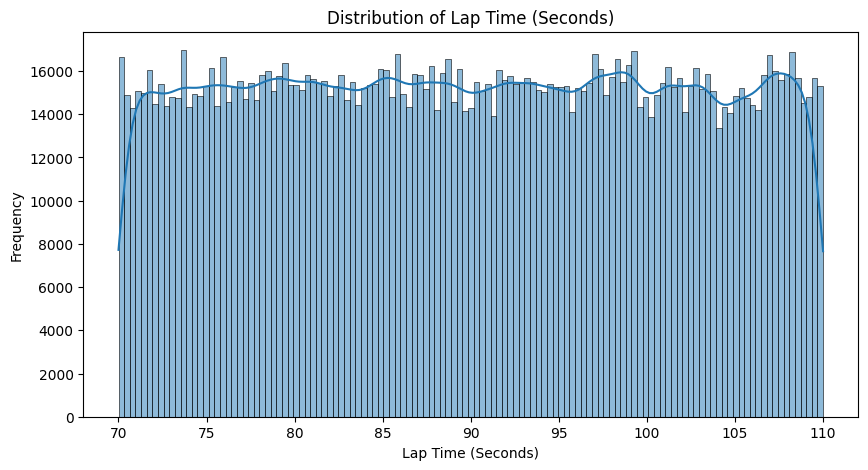

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(train_df['Lap_Time_Seconds'], kde=True)
plt.title("Distribution of Lap Time (Seconds)")
plt.xlabel("Lap Time (Seconds)")
plt.ylabel("Frequency")
plt.show()


In [9]:
# Only numeric features
numeric_cols = train_df.select_dtypes(include='number').columns.tolist()

# Correlation with target
correlations = train_df[numeric_cols].corr()['Lap_Time_Seconds'].sort_values(ascending=False)
print("Feature correlations with Lap_Time_Seconds:\n", correlations)


Feature correlations with Lap_Time_Seconds:
 Lap_Time_Seconds                   1.000000
Corners_per_Lap                    0.008514
team                               0.007372
bike                               0.006116
position                           0.005892
rider                              0.003797
min_year                           0.003543
year_x                             0.001710
max_year                           0.001005
Championship_Points                0.000837
Grid_Position                      0.000746
Tire_Degradation_Factor_per_Lap    0.000676
Championship_Position              0.000641
Laps                               0.000614
Rider_ID                           0.000579
Unique ID                         -0.000014
Humidity_%                        -0.000018
Avg_Speed_kmh                     -0.000506
Circuit_Length_km                 -0.000837
air                               -0.001151
Pit_Stop_Duration_Seconds         -0.001746
sequence                       

In [13]:
# Only drop columns that actually exist in the DataFrame
cols_to_drop = ['Unique ID', 'Rider_ID', 'year_x']
cols_to_drop = [col for col in cols_to_drop if col in train_df.columns]

train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)


In [11]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical features
cat_cols = train_df.select_dtypes(include='object').columns

# Encode
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))  # Use same encoder
    label_encoders[col] = le


In [14]:
print("Encoded train_df:\n", train_df.head())
print("\nEncoded test_df:\n", test_df.head())
print("\nEncoded columns:", cat_cols)


Encoded train_df:
    category_x  Circuit_Length_km  Laps  Grid_Position  Avg_Speed_kmh  \
0           0              4.874    22             17         264.66   
1           0              3.875    24              7         177.56   
2           1              5.647    25              5         317.74   
3           1              4.810    19              3         321.82   
4           2              5.809    25             21         239.92   

   Track_Condition  Humidity_%  Tire_Compound_Front  Tire_Compound_Rear  \
0                1          61                    0                   0   
1                1          77                    2                   1   
2                0          87                    2                   0   
3                1          43                    2                   0   
4                1          47                    0                   1   

   Penalty  ...  air  ground  starts  finishes  with_points  podiums  wins  \
0        0  ...   2

In [2]:
import pandas as pd

train_df = pd.read_csv('train.csv') 


In [3]:
import pandas as pd

train_df = pd.read_csv('train.csv')  
print(train_df.head())  

   Unique ID  Rider_ID category_x  Circuit_Length_km  Laps  Grid_Position  \
0    1894944      2659      Moto2              4.874    22             17   
1      23438      5205      Moto2              3.875    24              7   
2     939678      7392      Moto3              5.647    25              5   
3    1196312      7894      Moto3              4.810    19              3   
4    1033899      6163     MotoGP              5.809    25             21   

   Avg_Speed_kmh Track_Condition  Humidity_% Tire_Compound_Front  ... air  \
0         264.66             Wet          61                Hard  ...  23   
1         177.56             Wet          77                Soft  ...  12   
2         317.74             Dry          87                Soft  ...  22   
3         321.82             Wet          43                Soft  ...  23   
4         239.92             Wet          47                Hard  ...  22   

  ground  starts  finishes with_points  podiums  wins  min_year  max_year 

In [3]:
import pandas as pd

# Load your training data CSV (update the filename if needed)
train_df = pd.read_csv("train.csv")  # make sure 'train.csv' exists

# Check if 'Lap_Time_Seconds' exists in the DataFrame
print("Columns in train_df:", train_df.columns)

# Split into features and target
X_train = train_df.drop('Lap_Time_Seconds', axis=1)
y_train = train_df['Lap_Time_Seconds']

print("✅ Data loaded.")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Columns in train_df: Index(['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps',
       'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%',
       'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty',
       'Championship_Points', 'Championship_Position', 'Session', 'year_x',
       'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname',
       'circuit_name', 'rider_name', 'team_name', 'bike_name',
       'Lap_Time_Seconds', 'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather',
       'track', 'air', 'ground', 'starts', 'finishes', 'with_points',
       'podiums', 'wins', 'min_year', 'max_year', 'years_active'],
      dtype='object')
✅ Data loaded.
X_train shape: (1914056, 44)
y_train shape: (1914056,)


In [4]:
# Reduce to fewer columns to avoid memory crash
X_train_reduced = X_train.iloc[:, :500]  # you can change 500 to a smaller number if needed
print("Reduced X_train shape:", X_train_reduced.shape)


Reduced X_train shape: (1914056, 44)


In [6]:
# Step 1: Identify categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns
print("Categorical columns:", list(categorical_cols))

# Step 2: One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
print("Encoded X_train shape:", X_train_encoded.shape)

# Step 3: Reduce number of features for training (to avoid MemoryError)
X_train_reduced = X_train_encoded.iloc[:, :500]  # or fewer if needed
print("Reduced X_train shape:", X_train_reduced.shape)


Categorical columns: ['category_x', 'Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty', 'Session', 'shortname', 'circuit_name', 'rider_name', 'team_name', 'bike_name', 'weather', 'track']
Encoded X_train shape: (1914056, 4147)
Reduced X_train shape: (1914056, 500)


In [15]:
import pandas as pd

df = pd.read_csv("train.csv")
print(df.columns.tolist())


['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty', 'Championship_Points', 'Championship_Position', 'Session', 'year_x', 'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname', 'circuit_name', 'rider_name', 'team_name', 'bike_name', 'Lap_Time_Seconds', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather', 'track', 'air', 'ground', 'starts', 'finishes', 'with_points', 'podiums', 'wins', 'min_year', 'max_year', 'years_active']


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# STEP 1: Load CSV
print("Step 1: Loading dataset...")
df = pd.read_csv("train.csv")
print("Loaded dataset with shape:", df.shape)

# STEP 2: Drop missing values
print("Step 2: Dropping missing values...")
df.dropna(inplace=True)
print("Shape after dropping NA:", df.shape)

# STEP 3: Set target
print("Step 3: Separating features and target...")
target_col = "Lap_Time_Seconds"
X = df.drop(columns=[target_col])
y = df[target_col]

# STEP 4: Encode categorical variables
print("Step 4: Encoding categorical variables...")
X_encoded = pd.get_dummies(X)
print("Encoded feature shape:", X_encoded.shape)

# STEP 5: Reduce data size for faster training
print("Step 5: Reducing data size...")
X_small = X_encoded.iloc[:1000, :100]  # Use only 1000 rows and 100 features
y_small = y.iloc[:1000]
print("Reduced dataset shape:", X_small.shape)

# STEP 6: Train-test split
print("Step 6: Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

# STEP 7: Train Linear Regression model
print("Step 7: Training Linear Regression model...")
model = LinearRegression()
model.fit(X_train, y_train)
print("Training complete.")

# STEP 8: Predict and evaluate
print("Step 8: Making predictions and evaluating model...")
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ RMSE on test data: {rmse:.4f}")


Step 1: Loading dataset...
Loaded dataset with shape: (1914056, 45)
Step 2: Dropping missing values...
Shape after dropping NA: (1592764, 45)
Step 3: Separating features and target...
Step 4: Encoding categorical variables...
Encoded feature shape: (1592764, 4147)
Step 5: Reducing data size...
Reduced dataset shape: (1000, 100)
Step 6: Splitting data into train and test sets...
Train shape: (800, 100) | Test shape: (200, 100)
Step 7: Training Linear Regression model...
Training complete.
Step 8: Making predictions and evaluating model...
✅ RMSE on test data: 13.3652


In [19]:
print(df.columns)


Index(['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps',
       'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%',
       'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty',
       'Championship_Points', 'Championship_Position', 'Session', 'year_x',
       'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname',
       'circuit_name', 'rider_name', 'team_name', 'bike_name',
       'Lap_Time_Seconds', 'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather',
       'track', 'air', 'ground', 'starts', 'finishes', 'with_points',
       'podiums', 'wins', 'min_year', 'max_year', 'years_active'],
      dtype='object')


In [20]:
df = pd.read_csv("train.csv")
print(df.columns)


Index(['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps',
       'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%',
       'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty',
       'Championship_Points', 'Championship_Position', 'Session', 'year_x',
       'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname',
       'circuit_name', 'rider_name', 'team_name', 'bike_name',
       'Lap_Time_Seconds', 'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather',
       'track', 'air', 'ground', 'starts', 'finishes', 'with_points',
       'podiums', 'wins', 'min_year', 'max_year', 'years_active'],
      dtype='object')


In [22]:
from lightgbm import early_stopping, log_evaluation

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[
        early_stopping(stopping_rounds=100),
        log_evaluation(period=200)
    ]
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 1531244, number of used features: 59
[LightGBM] [Info] Start training from score 90.001982
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l2: 131.275
[400]	valid_0's l2: 129.655
[600]	valid_0's l2: 128.077
[800]	valid_0's l2: 126.633
[1000]	valid_0's l2: 125.197
[1200]	valid_0's l2: 123.844
[1400]	valid_0's l2: 122.539
[1600]	valid_0's l2: 121.282
[1800]	valid_0's l2: 120.025
[2000]	valid_0's l2: 118.739
[2200]	valid_0's l2: 117.478
[2400]	valid_0's l2: 116.229
[2600]	valid_0's l2: 115.047
[2800]	valid_0's l2: 113.895
[3000]	valid_0's l2: 112.76
Did not meet early stopping. Best iteration is:
[3000]	valid_0's l2: 112.76


LGBMRegressor(colsample_bytree=0.9, learning_rate=0.01, max_depth=7,
              n_estimators=3000, random_state=42, reg_alpha=0.3, reg_lambda=0.3,
              subsample=0.85)

In [23]:
from lightgbm import early_stopping, log_evaluation

print("Training optimized LightGBM...")
model = lgb.LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=7,
    subsample=0.85,
    colsample_bytree=0.9,
    reg_alpha=0.3,
    reg_lambda=0.3,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[
        early_stopping(stopping_rounds=100),
        log_evaluation(period=200)
    ]
)


Training optimized LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.191633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 1531244, number of used features: 59
[LightGBM] [Info] Start training from score 90.001982
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l2: 131.275
[400]	valid_0's l2: 129.655
[600]	valid_0's l2: 128.077
[800]	valid_0's l2: 126.633
[1000]	valid_0's l2: 125.197
[1200]	valid_0's l2: 123.844
[1400]	valid_0's l2: 122.539
[1600]	valid_0's l2: 121.282
[1800]	valid_0's l2: 120.025
[2000]	valid_0's l2: 118.739
[2200]	valid_0's l2: 117.478
[2400]	valid_0's l2: 116.229
[2600]	valid_0's l2: 115.047
[2800]	valid_0's l2: 113.895
[3000]	valid_0's l2: 112.76
Did not meet early stopping. Best iteration is:
[3000]	valid_0's l2: 112.76


LGBMRegressor(colsample_bytree=0.9, learning_rate=0.01, max_depth=7,
              n_estimators=3000, random_state=42, reg_alpha=0.3, reg_lambda=0.3,
              subsample=0.85)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from math import sqrt

# STEP 1: Load Data
df = pd.read_csv("train.csv")

# STEP 2: Drop non-informative columns
drop_cols = ['Unique ID', 'Rider_ID', 'rider_name', 'team_name', 'bike_name']
df.drop(columns=drop_cols, inplace=True)

# STEP 3: Handle missing values
df.dropna(inplace=True)  # You may use fillna if you want to keep all rows

# STEP 4: Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# STEP 5: Split features and target
X = df.drop("Lap_Time_Seconds", axis=1)
y = df["Lap_Time_Seconds"]

# STEP 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 7: Train LightGBM
print("Training optimized LightGBM...")
model = lgb.LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[
        early_stopping(stopping_rounds=100),
        log_evaluation(period=200)
    ]
)

# STEP 8: Predict and evaluate
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.5f}")


Training optimized LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.176261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3432
[LightGBM] [Info] Number of data points in the train set: 1274211, number of used features: 39
[LightGBM] [Info] Start training from score 89.987351
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l2: 131.325
[400]	valid_0's l2: 129.705
[600]	valid_0's l2: 128.186
[800]	valid_0's l2: 126.691
[1000]	valid_0's l2: 125.17
[1200]	valid_0's l2: 123.663
[1400]	valid_0's l2: 122.206
[1600]	valid_0's l2: 120.866
[1800]	valid_0's l2: 119.518
[2000]	valid_0's l2: 118.211
[2200]	valid_0's l2: 116.944
[2400]	valid_0's l2: 115.706
[2600]	valid_0's l2: 114.437
[2800]	valid_0's l2: 113.224
[3000]	valid_0's l2: 112.058
Did not meet early stopping. Best iteration is:
[3000]	valid_0's l2: 112.058
RMSE: 10.58573


In [2]:
print(y.describe())


count    1.592764e+06
mean     8.999722e+01
std      1.152959e+01
min      7.000100e+01
25%      8.001300e+01
50%      8.997200e+01
75%      9.991200e+01
max      1.099990e+02
Name: Lap_Time_Seconds, dtype: float64


In [3]:
important_features = [
    'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh',
    'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius', 'Humidity_%', 'Penalty'
]

X = df[important_features]
y = df['Lap_Time_Seconds']


In [4]:
# Choose only the most relevant and stable numerical features
selected_features = [
    'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh',
    'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius', 'Humidity_%', 'Penalty'
]

X = df[selected_features]
y = df['Lap_Time_Seconds']


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Scale target y
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

model = lgb.LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.01,
    max_depth=6,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model without verbose
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.160287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1367
[LightGBM] [Info] Number of data points in the train set: 1274211, number of used features: 11
[LightGBM] [Info] Start training from score 0.499684
Training until validation scores don't improve for 100 rounds


In [9]:
!pip install xgboost


In [7]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# STEP 1: Scale the target variable
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# STEP 2: Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train_scaled)
dtest = xgb.DMatrix(X_test, label=y_test_scaled)

# STEP 3: Define parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# STEP 4: Train with early stopping
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=100,
    verbose_eval=100
)

# STEP 5: Predict and inverse scale
y_pred_scaled = model.predict(dtest)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# STEP 6: Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")




[0]	eval-rmse:1.00116
[100]	eval-rmse:0.99559
[200]	eval-rmse:0.99020
[300]	eval-rmse:0.98501
[400]	eval-rmse:0.98023
[500]	eval-rmse:0.97570
[600]	eval-rmse:0.97121
[700]	eval-rmse:0.96669
[800]	eval-rmse:0.96234
[900]	eval-rmse:0.95819
[999]	eval-rmse:0.95410
RMSE: 10.9992


In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

# STEP 1: Load the data
df = pd.read_csv("train.csv")

# STEP 2: Encode categorical columns (if any)
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# STEP 3: Define target and features
target_column = 'Lap_Time_Seconds'
X = df.drop(columns=[target_column])
y = df[target_column]

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 5: Scale the target variable
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# STEP 6: Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train_scaled)
dtest = xgb.DMatrix(X_test, label=y_test_scaled)

# STEP 7: Define model parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# STEP 8: Train the model with early stopping
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=100,
    verbose_eval=100
)

# STEP 9: Predict and inverse-transform target
y_pred_scaled = model.predict(dtest)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# STEP 10: Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ Final RMSE: {rmse:.5f}")

# STEP 11: Export predictions to CSV
submission = pd.DataFrame({
    "Predicted_Lap_Time_Seconds": y_pred
})
submission.to_csv("solution.csv", index=False)
print("📁 solution.csv file has been saved.")


[0]	eval-rmse:1.00115
[100]	eval-rmse:0.99520
[200]	eval-rmse:0.99028
[300]	eval-rmse:0.98582
[400]	eval-rmse:0.98132
[500]	eval-rmse:0.97681
[600]	eval-rmse:0.97228
[700]	eval-rmse:0.96764
[800]	eval-rmse:0.96299
[900]	eval-rmse:0.95845
[999]	eval-rmse:0.95395
✅ Final RMSE: 10.99756
📁 solution.csv file has been saved.


In [2]:
print("Lap time stats:")
print(df['Lap_Time_Seconds'].describe())


Lap time stats:
count    1.914056e+06
mean     9.000211e+01
std      1.153121e+01
min      7.000100e+01
25%      8.001300e+01
50%      8.998100e+01
75%      9.991700e+01
max      1.099990e+02
Name: Lap_Time_Seconds, dtype: float64


[0]	eval-rmse:11.54019
[100]	eval-rmse:11.37748
[200]	eval-rmse:11.23603
[300]	eval-rmse:11.09171
[400]	eval-rmse:10.96166
[500]	eval-rmse:10.83581
[600]	eval-rmse:10.71271
[700]	eval-rmse:10.59856
[800]	eval-rmse:10.48529
[900]	eval-rmse:10.37248
[1000]	eval-rmse:10.26827
[1100]	eval-rmse:10.16174
[1200]	eval-rmse:10.06380
[1300]	eval-rmse:9.97138
[1400]	eval-rmse:9.88365
[1500]	eval-rmse:9.79560
[1600]	eval-rmse:9.70530
[1700]	eval-rmse:9.62081
[1800]	eval-rmse:9.54101
[1900]	eval-rmse:9.45467
[2000]	eval-rmse:9.36793
[2100]	eval-rmse:9.28838
[2200]	eval-rmse:9.20777
[2300]	eval-rmse:9.12587
[2400]	eval-rmse:9.04873
[2500]	eval-rmse:8.97095
[2600]	eval-rmse:8.89687
[2700]	eval-rmse:8.82137
[2800]	eval-rmse:8.74750
[2900]	eval-rmse:8.67457
[3000]	eval-rmse:8.60841
[3100]	eval-rmse:8.54550
[3200]	eval-rmse:8.47825
[3300]	eval-rmse:8.41413
[3400]	eval-rmse:8.34595
[3500]	eval-rmse:8.27921
[3600]	eval-rmse:8.21160
[3700]	eval-rmse:8.14605
[3800]	eval-rmse:8.08004
[3900]	eval-rmse:8.01657

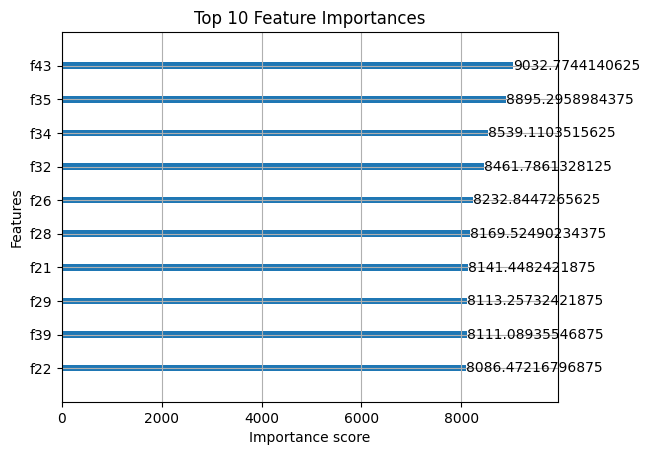

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# STEP 1: Load the data
df = pd.read_csv("train.csv")

# STEP 2: Encode categorical columns (if any)
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# STEP 3: Define target and features
target_column = 'Lap_Time_Seconds'
X = df.drop(columns=[target_column])
y = df[target_column]

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 5: Scale only the input features
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

# STEP 6: Convert to DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# STEP 7: Define improved model parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'reg_alpha': 1,
    'reg_lambda': 2,
    'nthread': -1,
    'seed': 42
}

# STEP 8: Train the model with early stopping
model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=200,
    verbose_eval=100
)

# STEP 9: Predict (no inverse transform needed)
y_pred = model.predict(dtest)

# STEP 10: Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ Final RMSE (in seconds): {rmse:.5f}")

# STEP 11: Export predictions to CSV
submission = pd.DataFrame({
    "Predicted_Lap_Time_Seconds": y_pred
})
submission.to_csv("solution.csv", index=False)
print("📁 solution.csv file has been saved.")

# STEP 12: Optional — Feature Importance Plot
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.show()


[0]	eval-rmse:11.54019
[100]	eval-rmse:11.37748
[200]	eval-rmse:11.23603
[300]	eval-rmse:11.09171
[400]	eval-rmse:10.96166
[500]	eval-rmse:10.83581
[600]	eval-rmse:10.71271
[700]	eval-rmse:10.59856
[800]	eval-rmse:10.48529
[900]	eval-rmse:10.37248
[1000]	eval-rmse:10.26827
[1100]	eval-rmse:10.16174
[1200]	eval-rmse:10.06380
[1300]	eval-rmse:9.97138
[1400]	eval-rmse:9.88365
[1500]	eval-rmse:9.79560
[1600]	eval-rmse:9.70530
[1700]	eval-rmse:9.62081
[1800]	eval-rmse:9.54101
[1900]	eval-rmse:9.45467
[2000]	eval-rmse:9.36793
[2100]	eval-rmse:9.28838
[2200]	eval-rmse:9.20777
[2300]	eval-rmse:9.12587
[2400]	eval-rmse:9.04873
[2500]	eval-rmse:8.97095
[2600]	eval-rmse:8.89687
[2700]	eval-rmse:8.82137
[2800]	eval-rmse:8.74750
[2900]	eval-rmse:8.67457
[3000]	eval-rmse:8.60841
[3100]	eval-rmse:8.54550
[3200]	eval-rmse:8.47825
[3300]	eval-rmse:8.41413
[3400]	eval-rmse:8.34595
[3500]	eval-rmse:8.27921
[3600]	eval-rmse:8.21160
[3700]	eval-rmse:8.14605
[3800]	eval-rmse:8.08004
[3900]	eval-rmse:8.01657

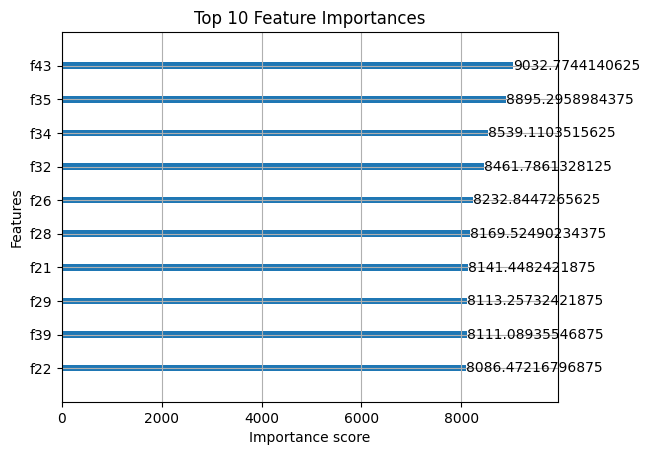

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# STEP 1: Load training data
train_df = pd.read_csv("train.csv")

# STEP 2: Encode categorical columns in train
label_encoders = {}
for col in train_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    label_encoders[col] = le  # Save encoder for test

# STEP 3: Define target and features
target_column = 'Lap_Time_Seconds'
X = train_df.drop(columns=[target_column])
y = train_df[target_column]

# STEP 4: Train-test split for validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 5: Scale input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# STEP 6: DMatrix conversion
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid)

# STEP 7: Model parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'reg_alpha': 1,
    'reg_lambda': 2,
    'nthread': -1,
    'seed': 42
}

# STEP 8: Train model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,
    evals=[(dvalid, 'eval')],
    early_stopping_rounds=200,
    verbose_eval=100
)

# STEP 9: Evaluate RMSE on validation set
y_pred_valid = model.predict(dvalid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f"✅ Validation RMSE: {rmse:.5f} seconds")

# STEP 10: Load test data
test_df = pd.read_csv("test.csv")

# STEP 11: Apply the same label encodings to test data
for col in test_df.select_dtypes(include='object').columns:
    if col in label_encoders:
        test_df[col] = label_encoders[col].transform(test_df[col].astype(str))

# STEP 12: Scale test features
X_test_scaled = scaler.transform(test_df)

# STEP 13: Predict on test data
dtest_final = xgb.DMatrix(X_test_scaled)
y_test_pred = model.predict(dtest_final)

# STEP 14: Save predictions
submission = pd.DataFrame({
    "Predicted_Lap_Time_Seconds": y_test_pred
})
submission.to_csv("solution.csv", index=False)
print("📁 solution.csv with test predictions has been saved.")

# STEP 15: Feature importance (optional)
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.show()


In [5]:
print(train_df.columns.tolist())


['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty', 'Championship_Points', 'Championship_Position', 'Session', 'year_x', 'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname', 'circuit_name', 'rider_name', 'team_name', 'bike_name', 'Lap_Time_Seconds', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather', 'track', 'air', 'ground', 'starts', 'finishes', 'with_points', 'podiums', 'wins', 'min_year', 'max_year', 'years_active']


In [6]:
def engineer_features(df):
    # Lap Efficiency: longer circuits with fewer laps might indicate better lap time management
    df["Lap_Efficiency"] = df["Circuit_Length_km"] / (df["Laps"] + 1e-5)
    
    # Tire Combo Code: combine front and rear tires (label encoding later)
    df["Tire_Combo"] = df["Tire_Compound_Front"].astype(str) + "_" + df["Tire_Compound_Rear"].astype(str)
    
    # Tire Wear Impact
    df["Tire_Wear_Impact"] = df["Tire_Degradation_Factor_per_Lap"] * df["Laps"]
    
    # Temperature Delta
    df["Temp_Delta"] = df["Track_Temperature_Celsius"] - df["Ambient_Temperature_Celsius"]
    
    # Experience Proxy
    df["Experience_Years"] = df["max_year"] - df["min_year"]
    
    # Consistency Score
    df["Consistency_Score"] = df["with_points"] / (df["starts"] + 1e-5)
    
    # Podium Rate
    df["Podium_Rate"] = df["podiums"] / (df["starts"] + 1e-5)

    # Win Rate
    df["Win_Rate"] = df["wins"] / (df["starts"] + 1e-5)

# Apply to train and test sets
engineer_features(train_df)
engineer_features(test_df)


In [7]:
from sklearn.preprocessing import LabelEncoder

for col in train_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    all_vals = list(train_df[col].astype(str).values) + list(test_df[col].astype(str).values)
    le.fit(all_vals)
    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))


In [8]:
print(train_df.columns[-10:])  


Index(['max_year', 'years_active', 'Lap_Efficiency', 'Tire_Combo',
       'Tire_Wear_Impact', 'Temp_Delta', 'Experience_Years',
       'Consistency_Score', 'Podium_Rate', 'Win_Rate'],
      dtype='object')


In [9]:
print(train_df.head(2))


   Unique ID  Rider_ID  category_x  Circuit_Length_km  Laps  Grid_Position  \
0    1894944      2659           0              4.874    22             17   
1      23438      5205           0              3.875    24              7   

   Avg_Speed_kmh  Track_Condition  Humidity_%  Tire_Compound_Front  ...  \
0         264.66                1          61                    0  ...   
1         177.56                1          77                    2  ...   

   max_year  years_active  Lap_Efficiency  Tire_Combo  Tire_Wear_Impact  \
0      2021             4        0.221545           0            0.0924   
1      1983             8        0.161458           7            0.0600   

   Temp_Delta  Experience_Years  Consistency_Score  Podium_Rate  Win_Rate  
0         4.3                 3           0.773585     0.075472  0.000000  
1         7.5                 8           0.814815     0.074074  0.037037  

[2 rows x 53 columns]
